# Random Forest

#### TL; DR
To develop a deeper understanding/intuition of the Random Forest algorithm

### Key Takeaways

- "feature bagging" just like bagging but with the features randomly selected as well.

- build a set of tress decorrelated from each other. Below we want the $\varrho$ to be close to 0:

$$var(\bar{\theta}_{B})=\frac{1-\varrho}{B}\sigma^2+\varrho \sigma^2$$

**- decorrelate trees by randomly choosing which features or samples to train on.**

- Recommended approach to choosing the random $d$ features to train on $d<<D$ (but more art than science)

$$classification: d=floor(\sqrt{D})$$
$$regression: d=floor(\sqrt{D/3})$$

### Advantages of RF

- requires very little tuning (unlike NN)

- performance to accuracy ratio is high

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from future.utils import iteritems
from builtins import range, input

In [24]:
class DataTransformer:
    def fit(self, df):
        self.scalers = {}
        for col in NUMERICAL_COLS:
          scaler = StandardScaler()
          scaler.fit(df[col].values.reshape(-1, 1))
          self.scalers[col] = scaler

    def transform(self, df):
        N, _ = df.shape
        D = len(NUMERICAL_COLS) + len(NO_TRANSFORM)
        X = np.zeros((N, D))
        i = 0
        for col, scaler in iteritems(self.scalers):
          X[:,i] = scaler.transform(df[col].values.reshape(-1, 1)).flatten()
          i += 1
        for col in NO_TRANSFORM:
          X[:,i] = df[col]
          i += 1
        return X

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

In [25]:
NUMERICAL_COLS = [
  'crim', # numerical
  'zn', # numerical
  'nonretail', # numerical
  'nox', # numerical
  'rooms', # numerical
  'age', # numerical
  'dis', # numerical
  'rad', # numerical
  'tax', # numerical
  'ptratio', # numerical
  'b', # numerical
  'lstat', # numerical
]

NO_TRANSFORM = ['river']

In [26]:
def get_data():
    df = pd.read_csv('./data/hou_all.csv', header=None, 
                     engine='python')
    len(df)
    df.columns = [
        'crim', # numerical
        'zn', # numerical
        'nonretail', # numerical
        'river', # binary
        'nox', # numerical
        'rooms', # numerical
        'age', # numerical
        'dis', # numerical
        'rad', # numerical
        'tax', # numerical
        'ptratio', # numerical
        'b', # numerical
        'lstat', # numerical
        'medv', # numerical -- this is the target
        'biascol'
      ]
    df.drop(['biascol'], axis=1, inplace=True)
    # transform the data
    transformer = DataTransformer()

    # shuffle the data
    N = len(df)
    train_idx = np.random.choice(N, size=int(0.7*N), replace=False)
    test_idx = [i for i in range(N) if i not in train_idx]
    df_train = df.loc[train_idx]
    df_test = df.loc[test_idx]

    Xtrain = transformer.fit_transform(df_train)
    Ytrain = np.log(df_train['medv'].values)
    Xtest = transformer.transform(df_test)
    Ytest = np.log(df_test['medv'].values)
    return Xtrain, Ytrain, Xtest, Ytest

/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595:

ymin: 2.0 ymax: 4.0


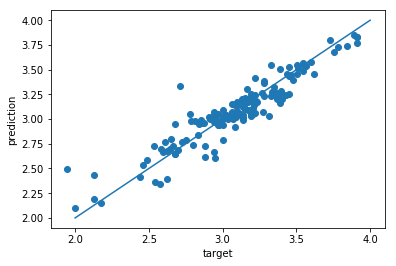

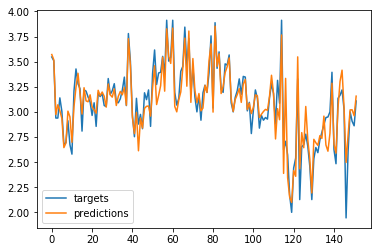

/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/marktblack/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CV single tree: 0.6411594385638071
CV baseline: 0.7597919931324251
CV forest: 0.7933961192630484
test score single tree: 0.6820866911819347
test score baseline: 0.7843333613523858
test score forest: 0.8655991090323727


In [27]:
if __name__ == '__main__':
  Xtrain, Ytrain, Xtest, Ytest = get_data()

  model = RandomForestRegressor(n_estimators=100) # try 10, 20, 50, 100, 200
  model.fit(Xtrain, Ytrain)
  predictions = model.predict(Xtest)

  # plot predictions vs targets
  plt.scatter(Ytest, predictions)
  plt.xlabel("target")
  plt.ylabel("prediction")
  ymin = np.round( min( min(Ytest), min(predictions) ) )
  ymax = np.ceil( max( max(Ytest), max(predictions) ) )
  print("ymin:", ymin, "ymax:", ymax)
  r = range(int(ymin), int(ymax) + 1)
  plt.plot(r, r)
  plt.show()

  plt.plot(Ytest, label='targets')
  plt.plot(predictions, label='predictions')
  plt.legend()
  plt.show()

  # do a quick baseline test
  baseline = LinearRegression()
  single_tree = DecisionTreeRegressor()
  print("CV single tree:", cross_val_score(single_tree, Xtrain, Ytrain).mean())
  print("CV baseline:", cross_val_score(baseline, Xtrain, Ytrain).mean())
  print("CV forest:", cross_val_score(model, Xtrain, Ytrain).mean())

  # test score
  single_tree.fit(Xtrain, Ytrain)
  baseline.fit(Xtrain, Ytrain)
  print("test score single tree:", single_tree.score(Xtest, Ytest))
  print("test score baseline:", baseline.score(Xtest, Ytest))
  print("test score forest:", model.score(Xtest, Ytest))

### RF v. Bag

In [33]:
# from util import BaggedTreeRegressor, BaggedTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier, BaggingClassifier


In [34]:
def plot_decision_boundary(X, model):
  h = .02  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


class BaggedTreeRegressor:
  def __init__(self, n_estimators, max_depth=None):
    self.B = n_estimators
    self.max_depth = max_depth

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeRegressor(max_depth=self.max_depth)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return predictions / self.B

  def score(self, X, Y):
    d1 = Y - self.predict(X)
    d2 = Y - Y.mean()
    return 1 - d1.dot(d1) / d2.dot(d2)


class BaggedTreeClassifier:
  def __init__(self, n_estimators, max_depth=None):
    self.B = n_estimators
    self.max_depth = max_depth

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeClassifier(max_depth=self.max_depth)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    # no need to keep a dictionary since we are doing binary classification
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return np.round(predictions / self.B)

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)

num_trees: 0
num_trees: 10
num_trees: 20
num_trees: 30
num_trees: 40
num_trees: 50
num_trees: 60
num_trees: 70
num_trees: 80
num_trees: 90
num_trees: 100
num_trees: 110
num_trees: 120
num_trees: 130
num_trees: 140
num_trees: 150
num_trees: 160
num_trees: 170
num_trees: 180
num_trees: 190
num_trees: 200
num_trees: 210
num_trees: 220
num_trees: 230
num_trees: 240
num_trees: 250
num_trees: 260
num_trees: 270
num_trees: 280
num_trees: 290


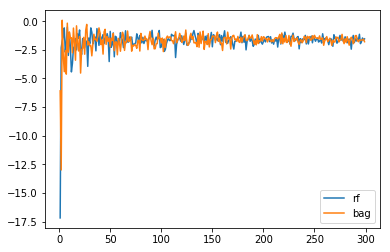

In [35]:
# make simple regression data
N = 15
D = 100
X = (np.random.random((N, D)) - 0.5)*10
Y = X.sum(axis=1)**2 + 0.5*np.random.randn(N)
Ntrain = N//2
Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]
Xtest = X[Ntrain:]
Ytest = Y[Ntrain:]

# from rf_classification import get_data
# X, Y = get_data()
# Ntrain = int(0.8*len(X))
# Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
# Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

# from rf_regression import get_data
# Xtrain, Ytrain, Xtest, Ytest = get_data()

T = 300
test_error_rf = np.empty(T)
test_error_bag = np.empty(T)
for num_trees in range(T):
  if num_trees == 0:
    test_error_rf[num_trees] = None
    test_error_bag[num_trees] = None
  else:
    rf = RandomForestRegressor(n_estimators=num_trees)
    # rf = RandomForestClassifier(n_estimators=num_trees)
    rf.fit(Xtrain, Ytrain)
    test_error_rf[num_trees] = rf.score(Xtest, Ytest)

    bg = BaggedTreeRegressor(n_estimators=num_trees)
    # bg = BaggedTreeClassifier(n_estimators=num_trees)
    bg.fit(Xtrain, Ytrain)
    test_error_bag[num_trees] = bg.score(Xtest, Ytest)

  if num_trees % 10 == 0:
    print("num_trees:", num_trees)

plt.plot(test_error_rf, label='rf')
plt.plot(test_error_bag, label='bag')
plt.legend()
plt.show()

In [36]:
# from rf_regression import get_data
# Xtrain, Ytrain, Xtest, Ytest = get_data()

class NotAsRandomForest: # Not as random as a Random Forest
  def __init__(self, n_estimators):
    self.B = n_estimators

  def fit(self, X, Y, M=None):
    N, D = X.shape
    if M is None:
      M = int(np.sqrt(D))

    self.models = []
    self.features = []
    for b in range(self.B):
      tree = DecisionTreeClassifier()

      # sample features
      features = np.random.choice(D, size=M, replace=False)

      # sample training samples
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      tree.fit(Xb[:, features], Yb)
      self.features.append(features)
      self.models.append(tree)

  def predict(self, X):
    N = len(X)
    P = np.zeros(N)
    for features, tree in zip(self.features, self.models):
      P += tree.predict(X[:, features])
    return np.round(P / self.B)

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(P == Y)


T = 500
test_error_prf = np.empty(T)
test_error_rf = np.empty(T)
test_error_bag = np.empty(T)
for num_trees in range(T):
  if num_trees == 0:
    test_error_prf[num_trees] = None
    test_error_rf[num_trees] = None
    test_error_bag[num_trees] = None
  else:
    rf = RandomForestClassifier(n_estimators=num_trees)
    rf.fit(Xtrain, Ytrain)
    test_error_rf[num_trees] = rf.score(Xtest, Ytest)

    bg = BaggedTreeClassifier(n_estimators=num_trees)
    bg.fit(Xtrain, Ytrain)
    test_error_bag[num_trees] = bg.score(Xtest, Ytest)

    prf = NotAsRandomForest(n_estimators=num_trees)
    prf.fit(Xtrain, Ytrain)
    test_error_prf[num_trees] = prf.score(Xtest, Ytest)

  if num_trees % 10 == 0:
    print("num_trees:", num_trees)

plt.plot(test_error_rf, label='rf')
plt.plot(test_error_prf, label='pseudo rf')
plt.plot(test_error_bag, label='bag')
plt.legend()
plt.show()

num_trees: 0


ValueError: Unknown label type: 'continuous'